In [1]:
from src import walls_detection_traditional as wdt
from src import image_handle as ih
from glob import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
import imageio
import random

np.random.seed(42)

In [2]:
def plot_image_and_mask(image, mask, mask2=None):

    cols = 2 if mask2 == None else 3
    
    plt.figure(figsize=(15, 15))

    plt.subplot(1, cols, 1)
    plt.title('Original Image')
    plt.imshow(image)

    plt.subplot(1, cols, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')

    if cols == 3:
        plt.subplot(1, 3, 3)
        plt.title('Mask 2')
        plt.imshow(mask2, cmap='gray')

    plt.show()

def plot_images(image1, image2, text1="", text2=""):

    plt.figure(figsize=(15, 15))

    plt.subplot(1, 2, 1)
    plt.title(text1)
    plt.imshow(image1)

    plt.subplot(1, 2, 2)
    plt.title(text2)
    plt.imshow(image2)

    plt.show()

In [3]:
files = glob("data/images/*/*")

In [4]:
df = pd.DataFrame(files, columns=["filename"])
df = df.filename.str.split("/", expand=True)
df.columns = ["root", "images", "split", "filename"]
df["fullfilename"] = df.apply(lambda row: '/'.join(row.values.astype(str)), axis=1)

In [5]:
df_sample = df.sample(5, random_state=42)

# CubiCasa5k dataset

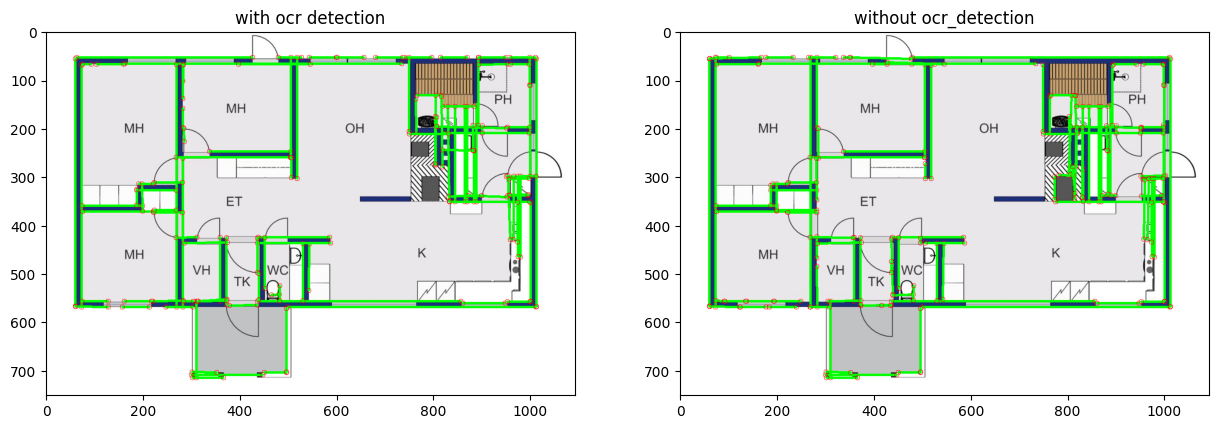

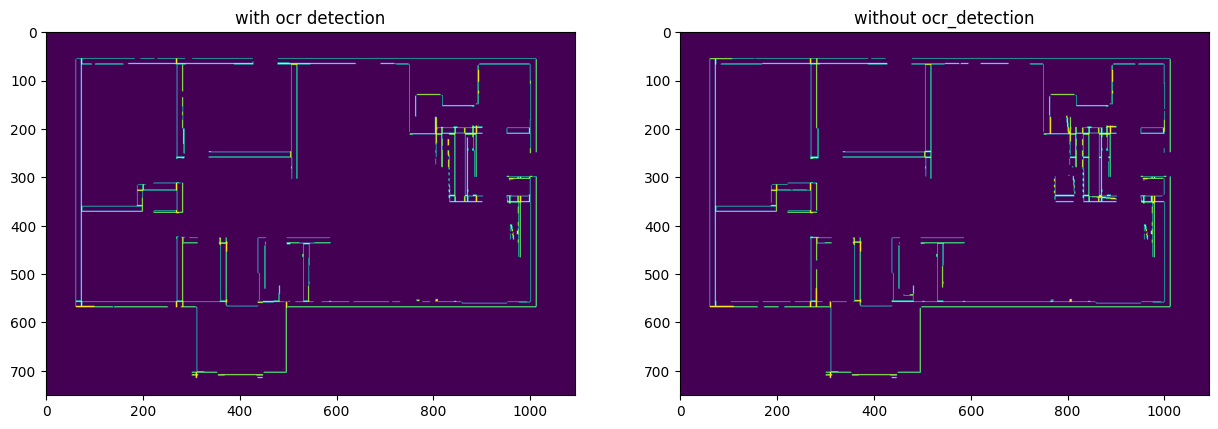

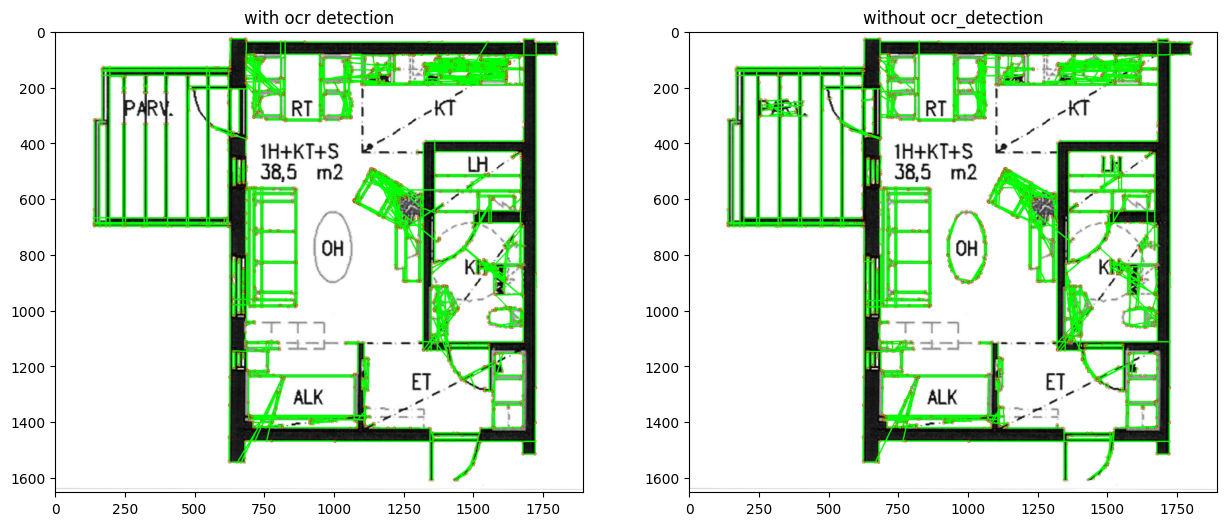

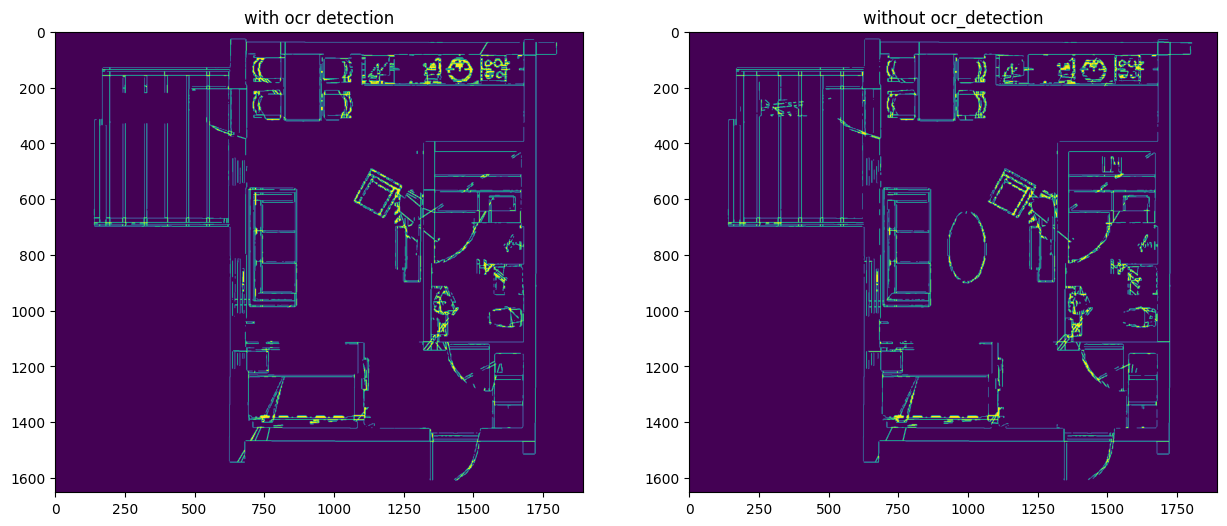

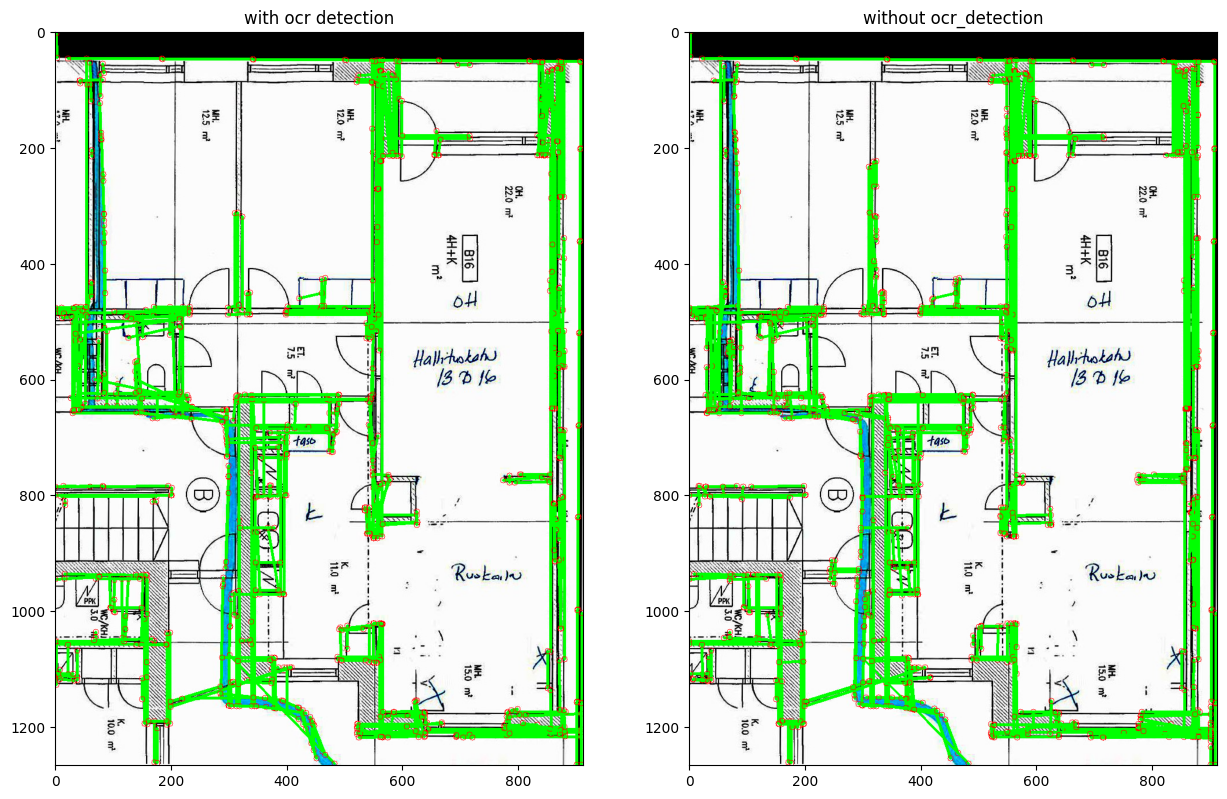

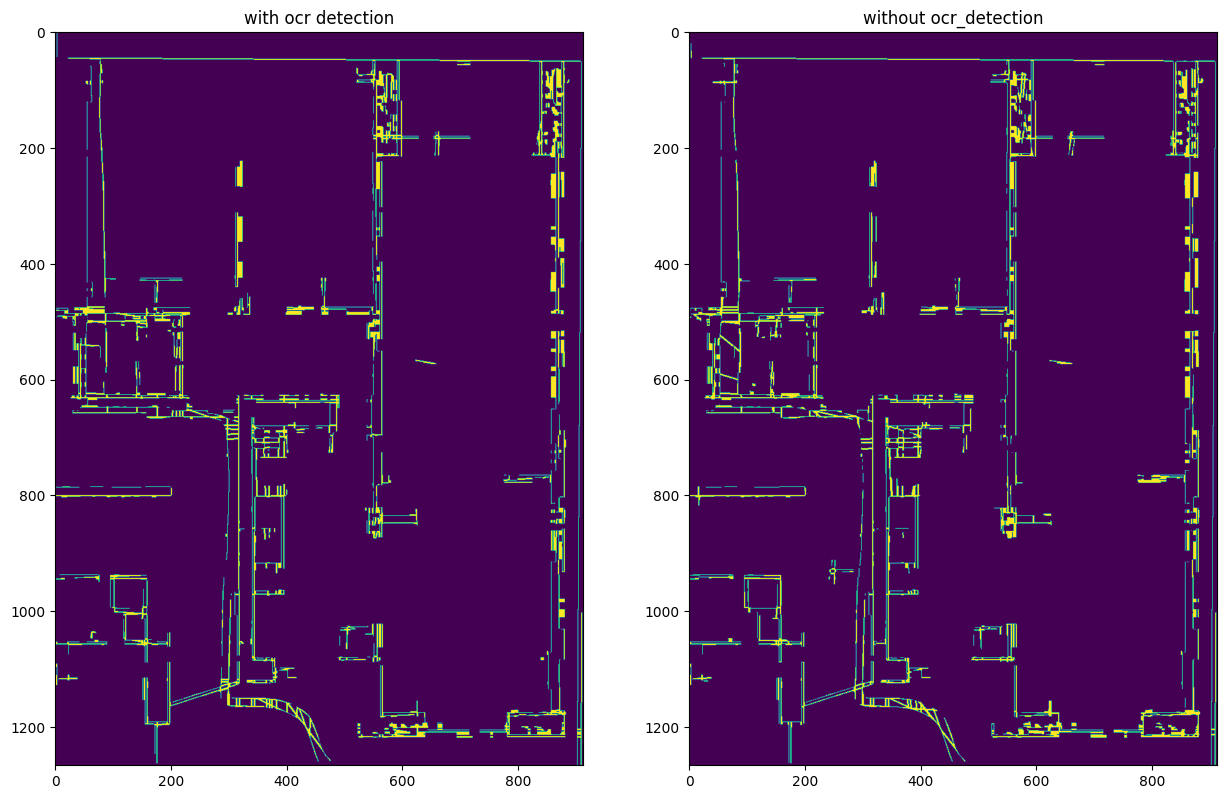

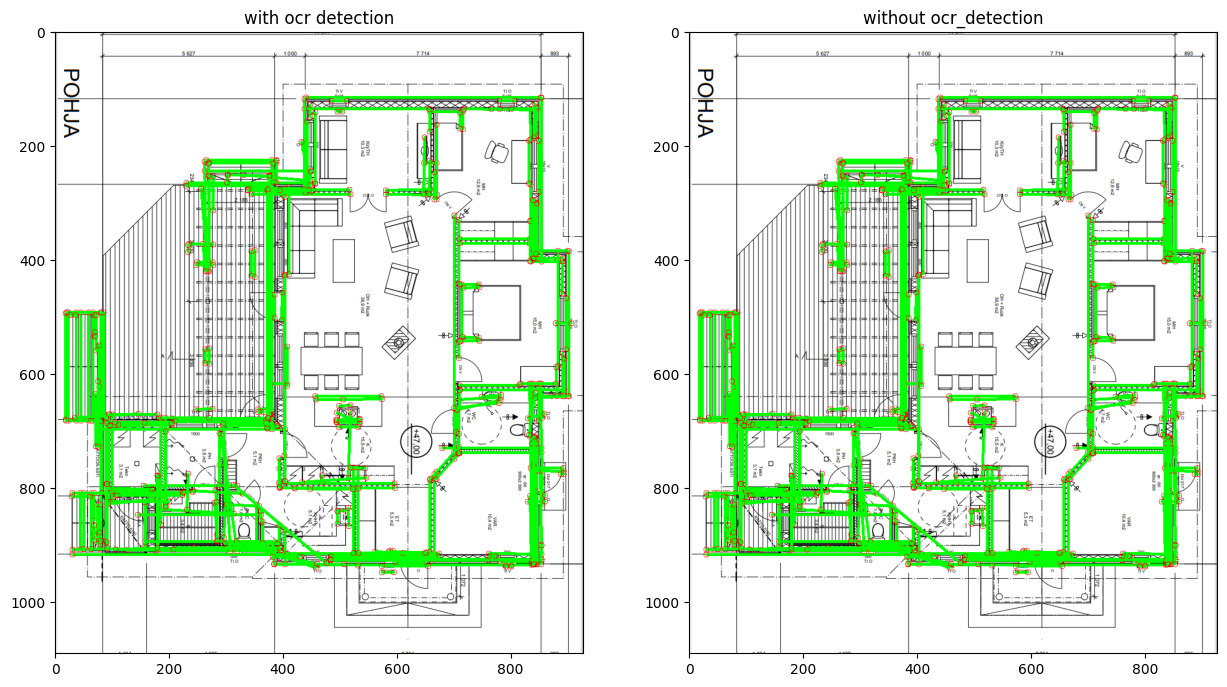

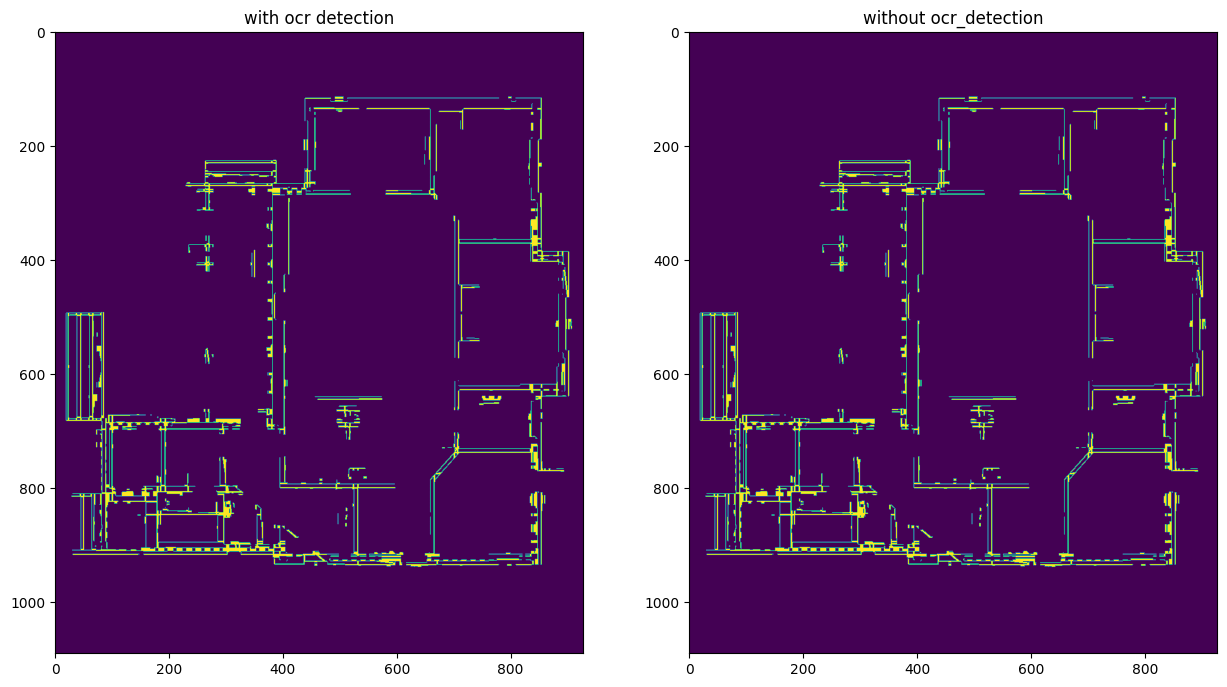

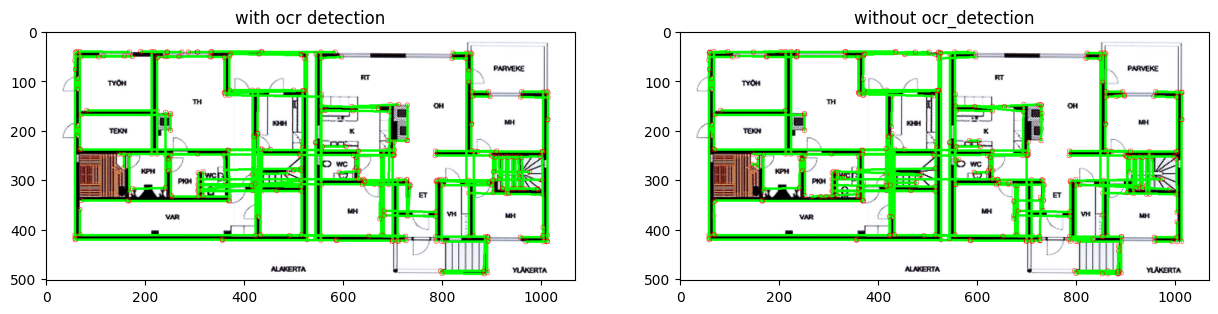

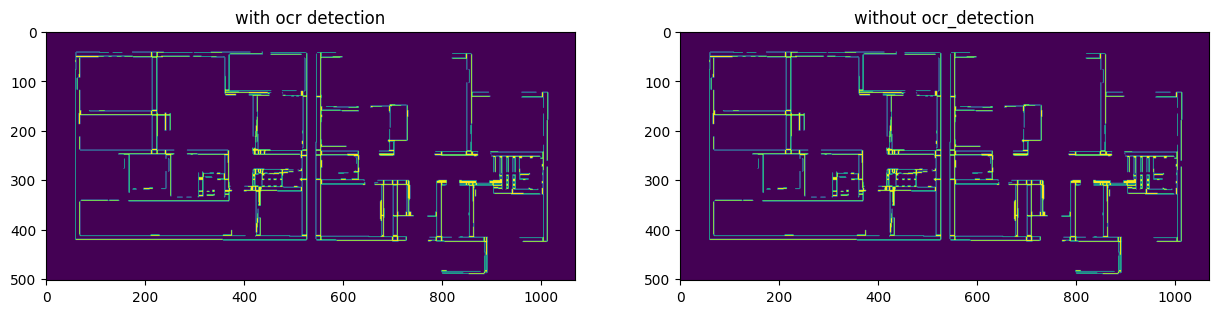

In [14]:
for i, row in df_sample.iterrows():
    
    image_original = cv2.cvtColor(cv2.imread(row.fullfilename, ), cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_original, cv2.COLOR_RGB2GRAY)
    
    image_withou_ocr, labels = wdt.get_wallsimage_original)
    mask_withou_ocr, labels = wdt.get_straight_lines(wdt.create_mask(image_gray))
    
    image_with_ocr, labels = wdt.get_walls(image_original, remove_text=True)
    mask_with_ocr, labels = wdt.get_straight_lines(wdt.create_mask(image_gray, remove_text=True))

    plot_images(image_with_ocr, image_withou_ocr,  "with ocr detection", "without ocr_detection")
    plot_images(mask_with_ocr, mask_withou_ocr,  "with ocr detection", "without ocr_detection")
    

# Test images

  0%|                                                     | 0/2 [00:00<?, ?it/s]Python(28560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(28561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(28562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


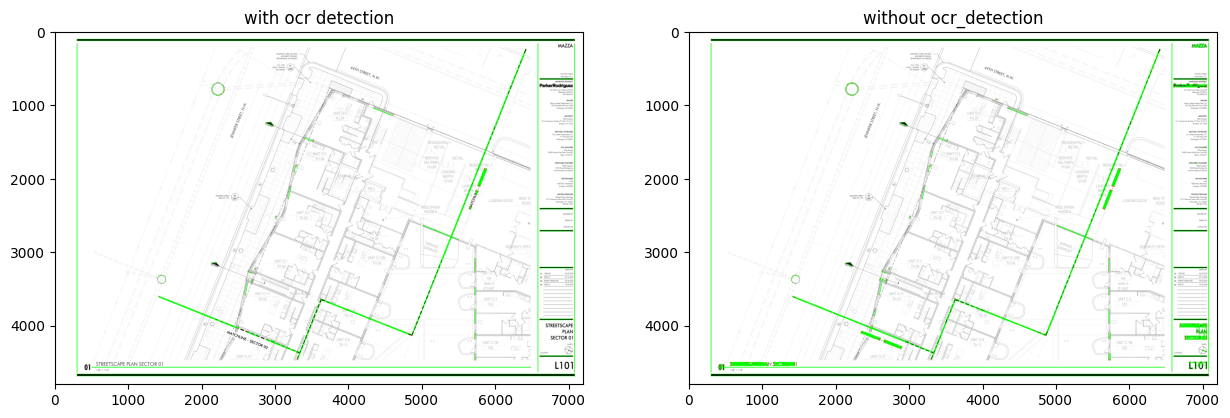

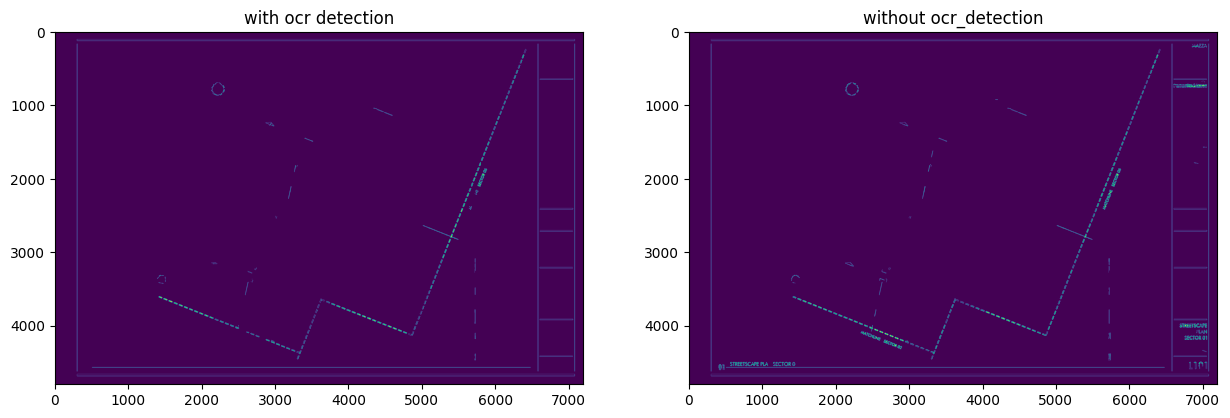

 50%|██████████████████████▌                      | 1/2 [01:11<01:11, 71.69s/it]Python(28627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(28628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(28629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


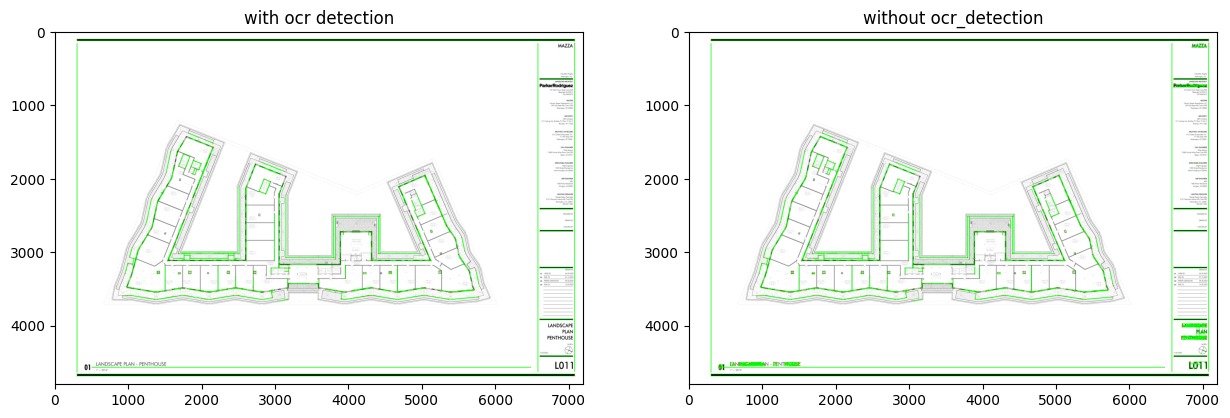

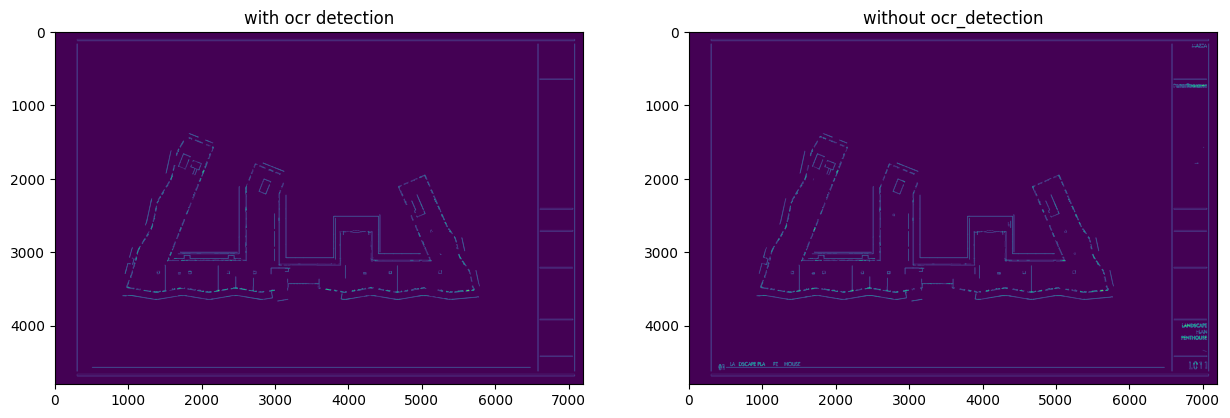

100%|█████████████████████████████████████████████| 2/2 [01:59<00:00, 59.75s/it]


In [7]:
files = random.sample(glob("dataset_test/_*"), 2)

for file in tqdm(files):
    
    file_image = ih.pdf_to_image_list(file)[0]
    image_original = file_image.copy()
    image_gray = cv2.cvtColor(image_original, cv2.COLOR_RGB2GRAY)
    
    image_withou_ocr, labels = wdt.get_walls(image_original)
    mask_withou_ocr, labels = wdt.get_straight_lines(wdt.create_mask(image_gray))
    
    image_with_ocr, labels = wdt.get_walls(image_original, remove_text=True)
    mask_with_ocr, labels = wdt.get_straight_lines(wdt.create_mask(image_gray, remove_text=True))

    plot_images(image_with_ocr, image_withou_ocr,  "with ocr detection", "without ocr_detection")
    plot_images(mask_with_ocr, mask_withou_ocr,  "with ocr detection", "without ocr_detection")

In [15]:
 
#for file in tqdm(files):
#    file_image = ih.pdf_to_image_list(file)[0]
#    image_original = file_image.copy()

#    images_splits = ih.split_image_if_large(image_original)
#    original_height, original_width, _ = image_original.shape

#    img_done = []
    
#    for image_part, position in imagens_divididas:

#        image = cv2.cvtColor(image_part, cv2.COLOR_RGB2GRAY)
#
#        mask = wdt.create_mask(image, 0.4)
#        mask_straight, labels = wdt.get_straight_lines(mask)
#        image_original_part = draw_lines_from_labels(image_part.copy(), labels)
#        img_done.append((image_original_part, position))

#    imagem_final = ih.join_images(img_done, original_width, original_height)
    
#    plt.figure(figsize=(15, 15))
#    plt.imshow(imagem_final)
#    plt.show()